# 1. Simple Linear Regression

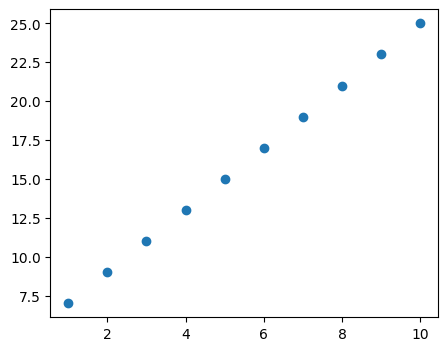

In [75]:
from matplotlib import pyplot as plt

x = [i+1 for i in range(10)]
y = [2 * i + 7 for i in range(10)]

plt.figure(figsize=(5, 4))
plt.scatter(x,y)
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

x = np.array(x)
x = x.reshape(-1, 1)

y = np.array(y)
y = y.reshape(-1, 1)

lr_model = LinearRegression()
lr_model.fit(x, y)

a = lr_model.coef_
b = lr_model.intercept_
y_predict = lr_model.predict(x)
MSE = mean_squared_error(y, y_predict)
R2 = r2_score(y, y_predict)

print(a, b, y_predict, MSE, R2)


[[2.]] [5.] [[ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]
 [23.]
 [25.]] 3.1554436208840474e-31 1.0


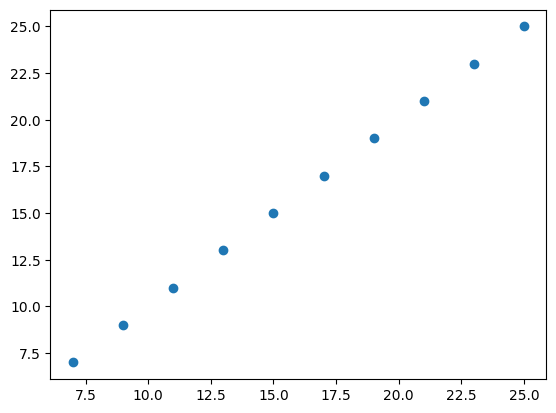

In [77]:
plt.figure()
plt.scatter(y, y_predict)
plt.show()

# 2. Multiple Factors Linear Regression

In [78]:
import pandas as pd

data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


Text(0.5, 1.0, 'Price VS Size')

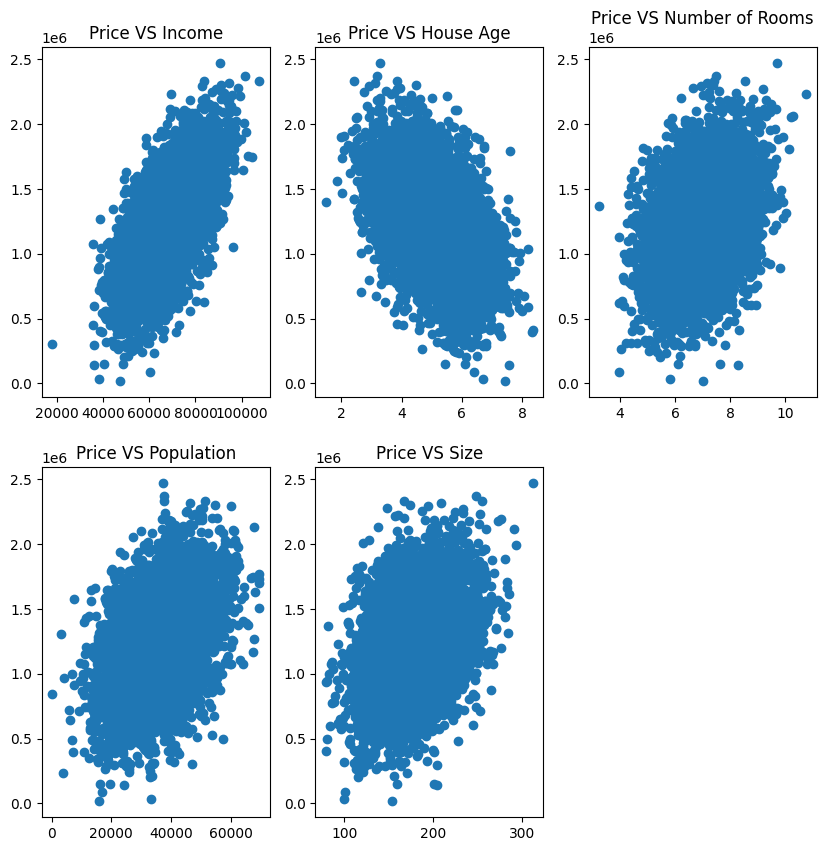

In [79]:
fig = plt.figure(figsize=(10, 10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('Price VS House Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Price VS Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Price VS Population')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.title('Price VS Size')

## 2.1 Price vs Size

In [80]:
house_size = data.loc[:, 'size'].values.reshape(-1, 1)
house_price = data.loc[:, 'Price'].values.reshape(-1, 1)
size_price_model = LinearRegression()
size_price_model.fit(house_size, house_price)

coef = size_price_model.coef_
intercept = size_price_model.intercept_
size_price_predict = size_price_model.predict(house_size)
MSE = mean_squared_error(house_price, size_price_predict)
R2 = r2_score(house_price, size_price_predict)

print(coef, intercept, size_price_predict, MSE, R2)

[[3674.54995744]] [585279.33130382] [[1276881.85636623]
 [1173363.58767144]
 [1420407.32457443]
 ...
 [1097848.86467426]
 [1264502.88144558]
 [1131278.58816273]] 108771672553.6264 0.1275031240418234


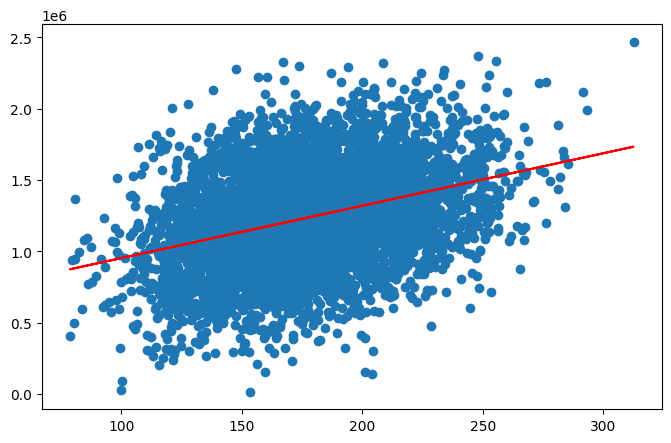

In [81]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(house_size, house_price)
plt.plot(house_size, size_price_predict, color='red')
plt.show()

## 2.2 Multiple Factors vs Price

In [82]:
factors = data.drop(['Price'], axis='columns').values.reshape(-1, 5)
print(factors.shape)

(5000, 5)


In [83]:
multi_factor_price_model = LinearRegression()
multi_factor_price_model.fit(factors, house_price)

multi_factor_price_predict = multi_factor_price_model.predict(factors)
MSE = mean_squared_error(house_price, multi_factor_price_predict)
R2 = r2_score(house_price, multi_factor_price_predict)
print(multi_factor_price_predict, MSE, R2)


[[1223968.89166086]
 [1497306.3318863 ]
 [1250884.31019438]
 ...
 [1020693.92390375]
 [1260503.36914586]
 [1302737.7915763 ]] 10219846512.177862 0.9180229195220739


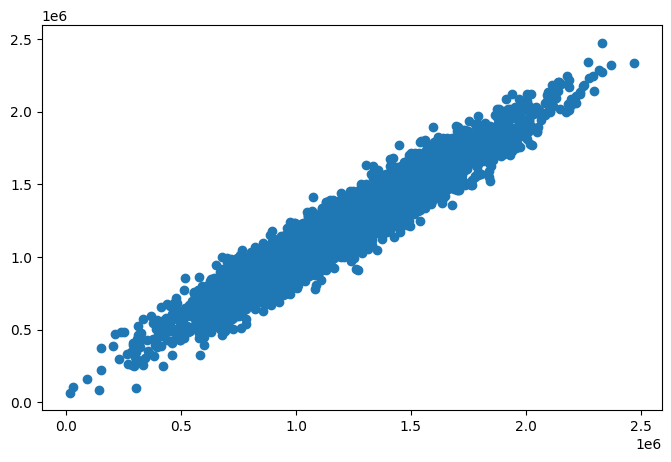

In [84]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(house_price, multi_factor_price_predict)
plt.show()

In [85]:
to_predict = [65000, 5, 5, 30000, 200]
to_predict = np.array(to_predict).reshape(1, -1)
predict_result = multi_factor_price_model.predict(to_predict)
print(predict_result)

[[817052.19516298]]
